# Tafera 1
<b>Alunos:</b> Andreza(), Gil() e Yan(118982)

### Importando as bibliotecas

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

### 1- Ler arquivo dados.npy
 <ul> 
    <li>Arquivo de 10500 linhas e 784 colunas, mas cada linha é uma matriz 28x28</li>
    </ul>

In [7]:
X = np.load("dados.npy")

### 2- Imprima a imagem dos 3 primeiros dígitos
 <ul> 
    <li>Passo 1: cada linha da matriz precisa ser transformada em outra matriz 28x28;</li>
    <li>Passo 2: codificação das cores para cinza;</li>
    <li>Passo 3: imprimir as 3 primeiras imagens;</li>
    </ul>

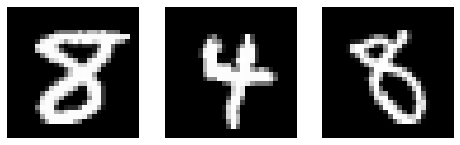

In [8]:
fig=plt.figure(figsize=(8, 8))
for i in range(0, 3):
    img = np.reshape(X[i], (28,28))
    fig.add_subplot(1, 3, i+1)
    img=plt.imshow(img)
    plt.axis('off')
    img.set_cmap('gray')
plt.show()

### 3- Faça a fatoração svd da matrix
 <ul> 
    <li>Passo 1: normalizar os dados para média O e desvio-padrão diferente de 1;</li>
    <li>Passo 2: fazer fatoração full_matrix e compacta;</li>
    <li>Passo 3: verificar o tamanho das matrizes;</li>
    </ul>

In [103]:
# Vetor com média zero
X_mean_zero = X - np.mean(X[:])

In [13]:
# Fatoração SVD full matrix
start = time.time()
u, s, vh = np.linalg.svd(X_mean_zero, full_matrices=True, compute_uv=True)
s=np.diag(s)
time_elapsed = time.time() - start
print("Tempo de execução SVD full matrix: {:.3f} seconds".format(time_elapsed))
print(u.shape, s.shape, vh.shape)

Tempo de execução SVD full matrix: 21.022 seconds
(10500, 10500) (784, 784) (784, 784)


In [14]:
# Fatoração SVD compacta
start = time.time()
u_red, s_red, vh_red = np.linalg.svd(X_mean_zero, full_matrices=False, compute_uv=True)
s_red=np.diag(s_red)
time_elapsed = time.time() - start
print("Tempo de execução SVD compacto: {:.3f} seconds".format(time_elapsed))
print(u_red.shape, s_red.shape, vh_red.shape)

Tempo de execução SVD compacto: 1.837 seconds
(10500, 784) (784, 784) (784, 784)


### 4- SVD truncado
 <ul> 
    <li>Usar a redução para 100 dimensões;</li>
    <li>Computar a matriz projetada. Será 10500 por 100. Apenas imprimir as dimensões;</li>
    <li>Computar a matriz reconstruída.Será 10500 por 784. Apenas imprimir as dimensões;</li>
    </ul>

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
# 4.1
truncated_svd = TruncatedSVD(n_components=100)
start = time.time()
truncated_svd.fit(X_mean_zero.T)
time_elapsed = time.time() - start
print("Tempo de execução SVD truncado: {:.3f} seconds".format(time_elapsed))
print(truncated_svd.components_.shape)

Tempo de execução SVD truncado: 0.936 seconds
(100, 10500)


### 5- Imprima a imagem reconstruída dos 3 primeiros dígitos
 <ul> 
    <li>Compare com as imagens impressas acima</li>
    </ul>

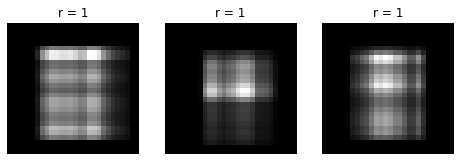

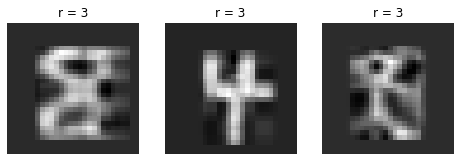

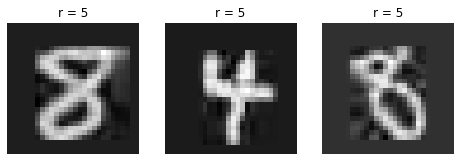

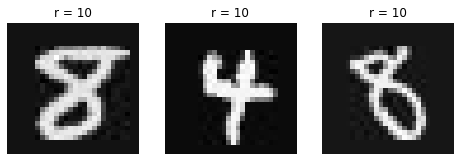

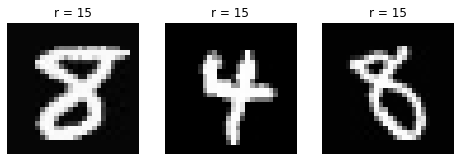

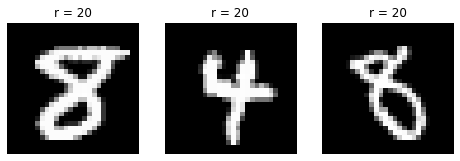

In [109]:
for r in (1,3,5,10,15,20):
    fig=plt.figure(figsize=(8, 8))
    for i in range(0,3):    
        A = X[i].reshape((28,28))
        U,S,VT = np.linalg.svd(A,full_matrices=False)
        S = np.diag(S)
        Aaprox=U[:,:r] @ S[0:r,:r] @ VT[:r,:]
        fig.add_subplot(1, 3, i+1)
        img = plt.imshow(Aaprox)
        img.set_cmap('gray')
        plt.axis('off')
        plt.title('r = '+str(r))
    plt.show()

### 6- Imprima os 3 primeiros eigen-dígitos

In [77]:
for i in range(0,3):
    print('Eigen-dígito {}: '.format(i+1) + str(S[i][i]))

Eigen-dígito 1: 1722.8675688947421
Eigen-dígito 2: 950.5553926422807
Eigen-dígito 3: 819.8773880412709


### 7- Decidindo o número de dimensões
 <ul> 
    <li>Quantas dimensões usando a regra de singular values maior que 1?</li>
    <li>Quantas dimensões manter para capturar 80% da variância dos dados?</li>
    <li>Quantas dimensões manter para capturar 95% da variância dos dados?</li>
    </ul>

Se for para cada linha da matriz, que representa uma imagem, temos:

In [141]:
for j in range(0,5):
    print('Imagem {}'.format(j))
    A = X[j].reshape((28,28))
    U,S,VT = np.linalg.svd(A,full_matrices=False)
    S = np.diag(S)
    i=0
    while S[i][i]>1:
        i=i+1
    print('Para capturar valores singulares maiores que um, necessitamos de {} dimensões'.format(i))
    i=0
    while np.cumsum(np.diag(S)/np.sum(np.diag(S)))[i]<0.8:
        i=i+1
    print('Para capturar 80% da variância dos dados necessitamos de {} dimensões'.format(i))

    i=0
    while np.cumsum(np.diag(S)/np.sum(np.diag(S)))[i]<0.95:
        i=i+1
    print('Para capturar 95% da variância dos dados necessitamos de {} dimensões \n'.format(i))

Imagem 0
Para capturar valores singulares maiores que um, necessitamos de 19 dimensões
Para capturar 80% da variância dos dados necessitamos de 5 dimensões
Para capturar 95% da variância dos dados necessitamos de 11 dimensões 

Imagem 1
Para capturar valores singulares maiores que um, necessitamos de 16 dimensões
Para capturar 80% da variância dos dados necessitamos de 4 dimensões
Para capturar 95% da variância dos dados necessitamos de 8 dimensões 

Imagem 2
Para capturar valores singulares maiores que um, necessitamos de 17 dimensões
Para capturar 80% da variância dos dados necessitamos de 5 dimensões
Para capturar 95% da variância dos dados necessitamos de 10 dimensões 

Imagem 3
Para capturar valores singulares maiores que um, necessitamos de 12 dimensões
Para capturar 80% da variância dos dados necessitamos de 3 dimensões
Para capturar 95% da variância dos dados necessitamos de 7 dimensões 

Imagem 4
Para capturar valores singulares maiores que um, necessitamos de 12 dimensões
Par

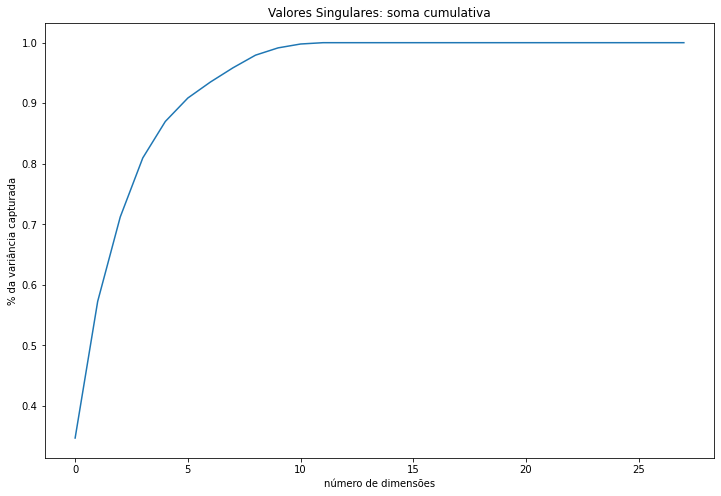

In [104]:
plt.figure(1)
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))
plt.title('Valores Singulares: soma cumulativa')
plt.xlabel('número de dimensões')
plt.ylabel('% da variância capturada')
plt.show()